## tSNE & UMAP 

**Importing Library**</br>
UMAP is from `umap-learn`

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as UMAP
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**Creating data using `make-blobs`**

In [24]:
centers = [[2, -6, -6], 
           [-1, 9, 4], 
           [-8, 7, 2], 
           [4, 7, 9]]
cluster_std = [1, 1, 2, 3.5]

# Data creation
X, labels_ = make_blobs(centers=centers, cluster_std=cluster_std, n_samples=500, random_state=42)

**Make plot using `plotly`**

In [45]:
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])
plt.figure(figsize=(12, 8))
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str), opacity=0.7, color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
    xaxis=dict(title='X'),
    yaxis=dict(title='Y'),
    zaxis=dict(title='Z')
))
fig.show()

<Figure size 1200x800 with 0 Axes>

**Standardize data**

In [46]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Apply t-SNE to reduce the dimensionality to 2D**

In [57]:
tsne = TSNE(max_iter=1000, n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_std)

**Lets plot above data**

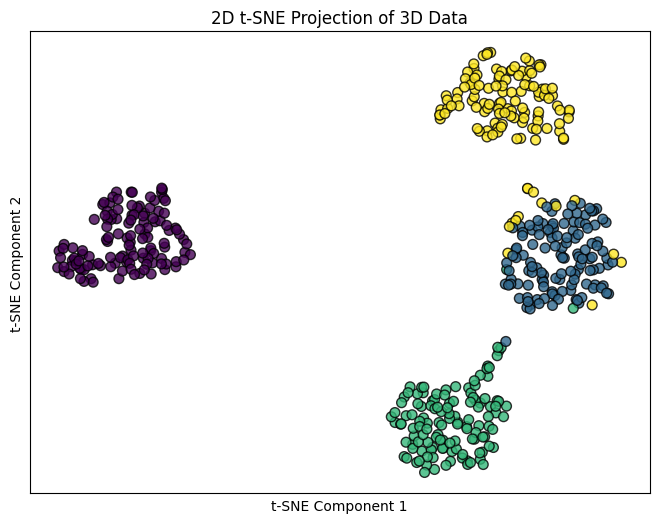

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, s=50, ec='k', alpha=0.8, cmap='viridis')
plt.title("2D t-SNE Projection of 3D Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.xticks([])
plt.yticks([])
plt.show()

**Observation**
- t-SNE projected the data into four distinct clusters, although the original data had some overlap between a few clusters.
- You can see that some of the points ended up in the "wrong" cluster, although to be fair, t-SNE has no knowledge of which clusters the points actually belong to. 
- All the clusters have similar densities.
- Two of the blobs are distinct from each other but "gave up" some of their points to the blob they originally had overlapped with.
- A "perfect" result would not completely separate the overlaps between blobs.
- Notice that the distance between the blobs is consistent with the degree to which they were originally separated.

**Lets use `UMAP` for dimensionality reduction**

In [64]:
umap = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1, n_jobs=1)
X_umap = umap.fit_transform(X_std)

**Lets visualize the plot**

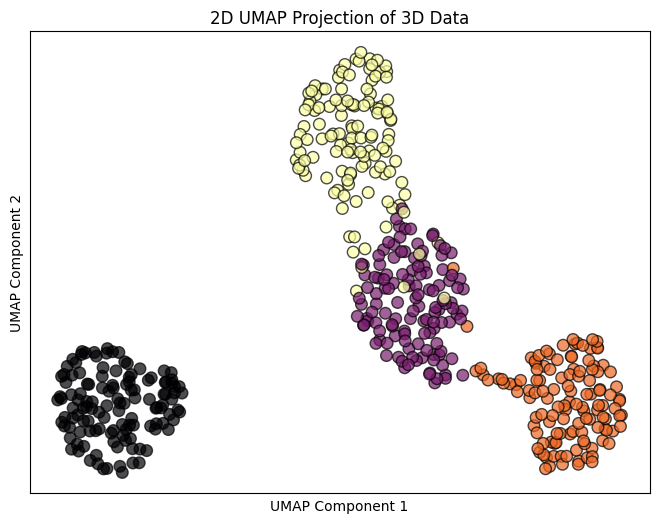

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='inferno', s=70, ec='k', alpha=0.7)
plt.title("2D UMAP Projection of 3D Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.xticks([])
plt.yticks([])
plt.show()

**Observation**
- UMAP correctly projected the data into four partially distinct clusters, with one cluster completely distinct from the others.
- Unlike t-SNE, it has preserved the connectedness that the original data had with the partially overlapping clusters.
- You can see that, like t-SNE, some of the points ended up in the "wrong" cluster.
- Again, like t-SNE, all the clusters have similar densities.
- A "perfect" result would not completely separate the overlaps between blobs, because they actually do overlap in the original feature space.
- The distance between the clusters is again consistent with the degree to which they were originally separated.

**Use PCA algorithm for dimensionality reduction**

In [66]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

**Visualize the result**

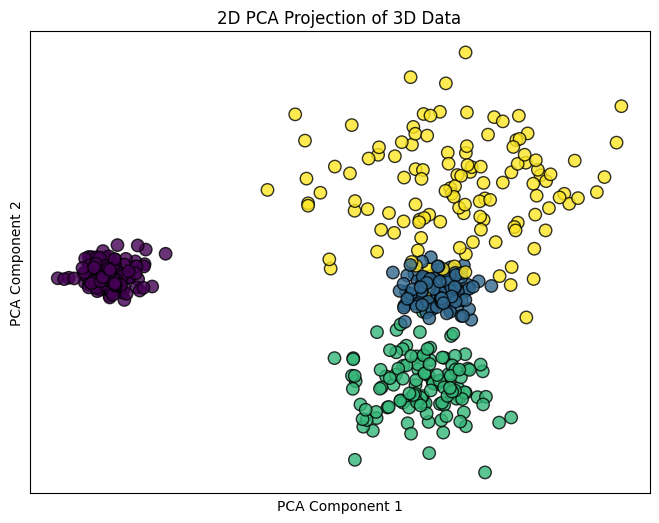

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=80, ec='k', alpha=0.8)
plt.title("2D PCA Projection of 3D Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.xticks([])
plt.yticks([])
plt.show()

**Observaions**
- PCA faithfully preserved the relative blob densities.
- PCA also preserved the relative separation between blobs.
- The distance between the clusters is very consistent with the degree to which they were originally separated.
- PCA and t-SNE took very little time to complete compared to UMAP.

**Lets plot original data**

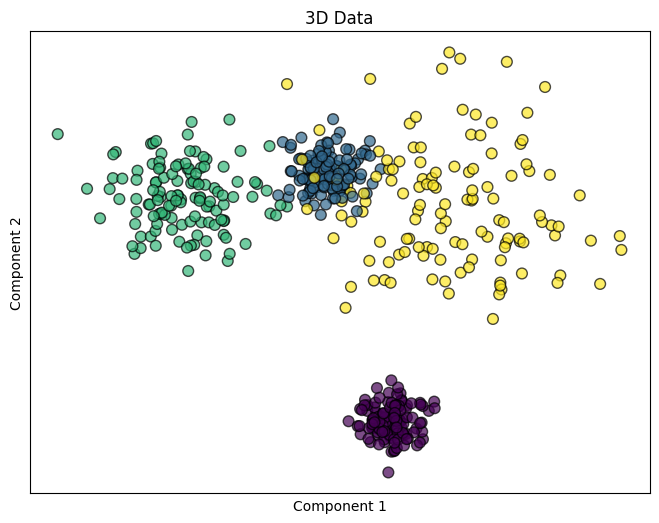

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels_, s=60, alpha=0.7, ec='k')
plt.title("3D Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.xticks([])
plt.yticks([])
plt.show()